In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset and analyzing the first few rows
screening_data = pd.read_csv(r'datasets 1\Autism_Screening_Data_Combined.csv')
toddler_autism_data = pd.read_csv(r'datasets 1\Toddler Autism dataset July 2018.csv')

Checking for the missing values 

In [14]:
screening_data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES


In [ ]:
screening_data.info()
# No null values in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jauundice   6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB


In [15]:
toddler_autism_data.head(5)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
toddler_autism_data.info()
# No null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

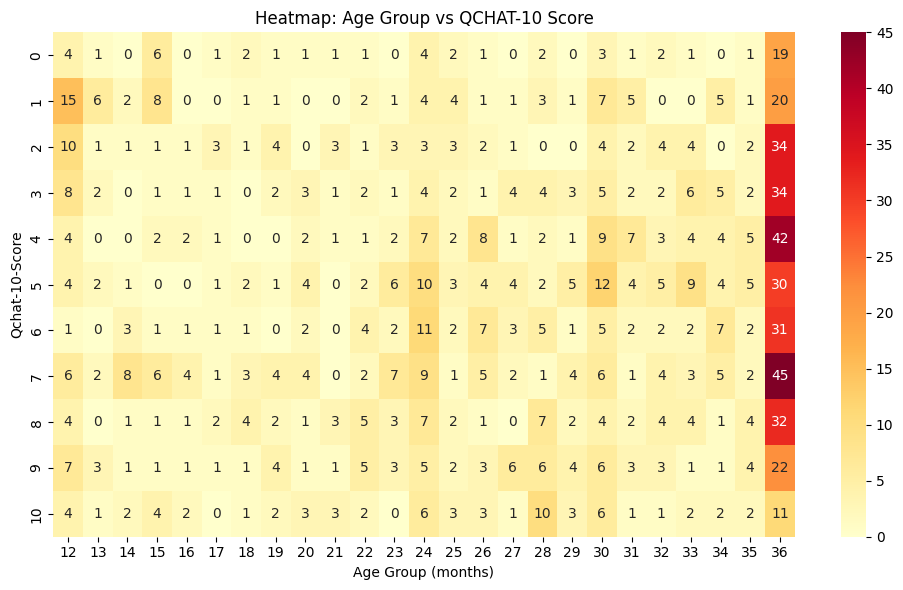

In [27]:
# Visualizing the dataset

toddler_autism_data['Age_Group'] = pd.cut(
    toddler_autism_data['Age_Mons'],
    bins=[17, 20, 23, 26, 29, 36],
    labels=['18-20', '21-23', '24-26', '27-29', '30-36']
)

# Create a pivot table to count how many kids fall into each (Age_Group, Qchat Score)
heatmap_data = toddler_autism_data.pivot_table(
    index='Qchat-10-Score', 
    columns='Age_Mons', 
    values='Case_No',
    aggfunc='count'
).fillna(0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Heatmap: Age Group vs QCHAT-10 Score")
plt.xlabel("Age Group (months)")
plt.ylabel("Qchat-10-Score")
plt.tight_layout()
plt.show()